# Week 3 Discussion


## Making static plots

## Plotnine

We will use the plotnine package, an implementation of ggplot2 for Python. Unlike packages we've seen so far, plotnine is not included with Anaconda. To install the package:

* On Windows, run `conda install -c conda-forge plotnine` in an Anaconda Prompt (find it in the start menu)
* On MacOS or Linux, run `conda install -c conda-forge plotnine` in the Terminal

You may have to restart Jupyter after installing. 

In [1]:
# !pip install plotnine

In [2]:
import plotnine as p9

p9.__version__

'0.12.4'

Our focus right now is _static_ visualization, where the visualization is a still image. So what packages should you actually use?

* __plotnine__ is convenient if you already know ggplot2. It's relatively new, so there are some bugs and missing features.

* __seaborn__ is designed specifically for making statistical plots. It's well-documented and stable. Most of the package's functions expect tidy data as input.

* __matplotlib__ is useful to know, since many other packages use matplotlib under the hood. That said, using matplotlib alone to create plots is painful; matplotlib is _low-level_, so it's flexible but simple plots may take [5 lines of code or more][ex]. The matplotlib PyPlot tools may be convenient if you already know MATLAB.

* __pandas__ provides built-in plotting functions, which can be convenient but are more limited than the packages above. They're also inconsistent about the expected format of the data.

We don't have time to exhaustively cover visualization packages for Python. You're welcome to explore other packages while doing the assignments for this class.

Later in the quarter, we'll see some of Python's _interactive_ visualization packages.

[ex]: https://dsaber.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/

See the [plotnine documentation](https://plotnine.readthedocs.io/en/latest/)! Also see the [ggplot2 documentation](https://ggplot2.tidyverse.org/reference/) and the [ggplot2 cheatsheet](https://www.maths.usyd.edu.au/u/UG/SM/STAT3022/r/current/Misc/data-visualization-2.1.pdf). If you run into a bug, you may want to check for a work-around on the [plotnine bug tracker](https://github.com/has2k1/plotnine/issues).

In [3]:
import numpy as np
import pandas as pd

In [4]:
# dont worry about the details here - we will discuss detailed data manipulation tomorrow

## Import dataset
milk = pd.read_excel("../data/fluidmilk.xlsx", skiprows = 1)
## Data cleansing; column names
milk.columns = milk.columns.str.replace('\n', '')
milk = milk.rename(columns=lambda df: df.strip(' 12')) # remove leading/trailing " ", "1", "2"
milk.columns.values[[0,2,3,5,6]] = np.array(['Year', 'Reduced', 'Low', 
                                             'Flavored Whole', 'Flavored Other'])
milk = milk[:-4] # get rid of the last four rows
milk = milk.drop(columns = 'Total')

milk['Year'] = pd.to_numeric(milk['Year'])

milk = milk.set_index("Year") # wide data

milk1 = milk.stack()
milk1 = milk1.reset_index() # long data
milk1.columns.values[[False, True, True]] = np.array(["Kind", "Sales"])

In [5]:
# this is the format that one needs to use plotnine
milk1.head(10)

,Year,Kind,Sales
0,1975,Whole,36188.0
1,1975,Reduced,8726.0
2,1975,Low,2742.0
3,1975,Skim,2480.0
4,1975,Flavored Whole,1366.0
5,1975,Flavored Other,719.0
6,1975,Buttermilk,1011.0
7,1975,Eggnog,76.0
8,1976,Whole,35241.0
9,1976,Reduced,9556.0


In [6]:
milk2 = milk[['Whole', 'Reduced']]
milk2 = milk2.reset_index()
milk2.head()

,Year,Whole,Reduced
0,1975,36188.0,8726.0
1,1976,35241.0,9556.0
2,1977,34036.0,10423.0
3,1978,33235.0,11017.0
4,1979,32480.0,11762.0


The syntax of plotnine closely follows the syntax of R's ggplot2. In R, we would write

```r
ggplot(milk, aes(x = Year, y = Sales, color = Kind)) + geom_line() 
```

One important difference is that plotnine requires that we quote variable names.

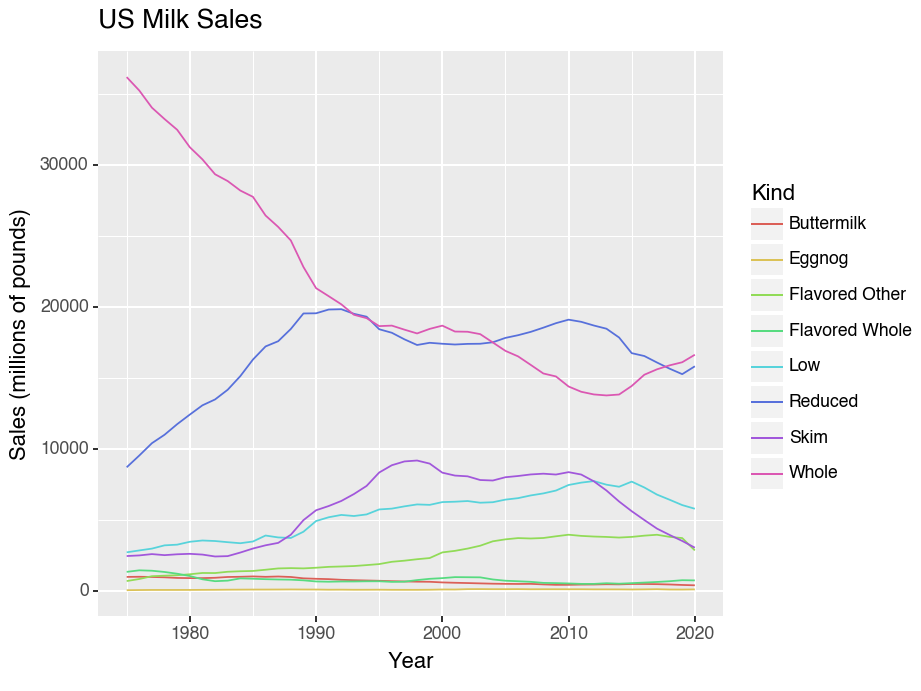

<Figure Size: (460 x 345)>

In [7]:
(
    p9.ggplot(milk1, p9.aes(x = "Year", y = "Sales", color = "Kind")) 
    + p9.geom_line()
    + p9.labs(title = "US Milk Sales", y = "Sales (millions of pounds)")
)

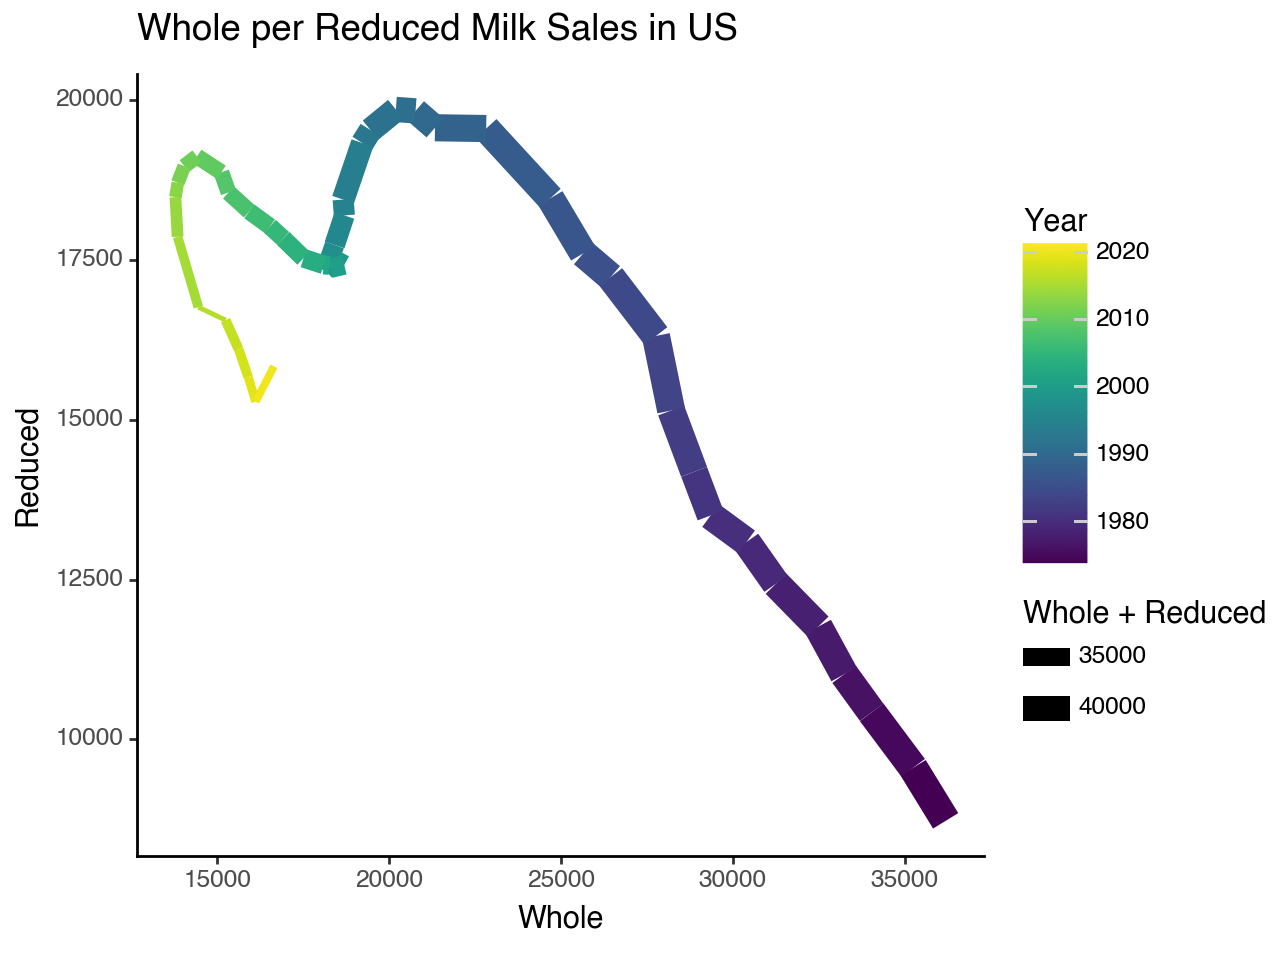

<Figure Size: (640 x 480)>

In [8]:
(
    p9.ggplot(milk2, p9.aes(x = "Whole", y = "Reduced"))
    + p9.theme_classic() 
    + p9.geom_path(p9.aes(color = "Year", size = "Whole + Reduced"), linejoin = 'mitre')
    + p9.labs(title = "Whole per Reduced Milk Sales in US")
)

`plotnine` includes the familiar `p9.ggsave()` function for saving a visualization to an image file.

## Jupyter and matplotlib

Jupyter notebooks can display most static visualizations and some interactive visualizations. If you're going to use visualization packages that depend on matplotlib, it's a good idea to set up your notebook by running:

In [9]:
# Initialize matplotlib for jupyter: 
%matplotlib inline 

import matplotlib.pyplot as plt

# Change the size of the plot
plt.rcParams["figure.figsize"] = [5, 5]

Matplot cheat sheet [see here][link1] 

[link1]:https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf

## Plotting the Milk Dataset with seaborn

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Seaborn library is included as part of the Anaconda distribution.

See the [seaborn documentation](https://seaborn.pydata.org/)!

In [10]:
import seaborn as sns

sns.__version__

'0.11.1'

In seaborn, the __hue__ parameter determines which column in the data frame should be used for colour encoding. 

Text(0.5, 1.0, 'US Milk Sales')

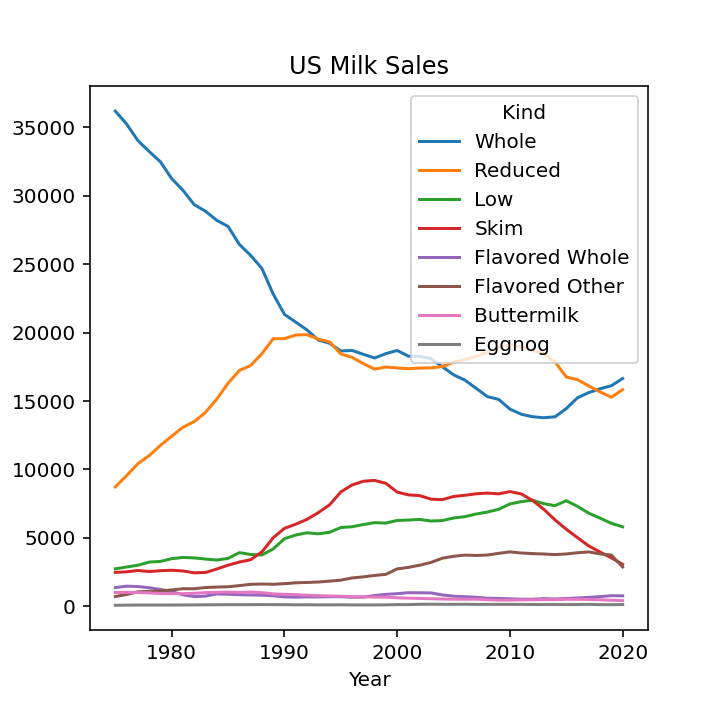

In [11]:
ax = sns.lineplot(x = "Year", y = "Sales", hue = "Kind", data = milk1)
ax.set_title("US Milk Sales")

If we want to adjust the size and layout, we have to learn more about matplotlib.

## The Basics of matplotlib

See the [matplotlib documentation](https://matplotlib.org/stable/users/index.html)!

First, let's change the size of the figures in the notebook. To do that, we need to go back to the code we used to initialize matplotlib, and adjust `rcParams`, matplotlib's default settings.

### Jargon

The most important thing to know is matplotlib's jargon:

* _Figure_: Container for plots.
* _Axes_: Container for components of a plot ("primitives"). In other words, an axes is a single plot.
* _Axis_: Container for components of an axis. An axis is a single axis.
* _Tick_: A container for tick marks on an axis.

All of the containers and the primitives are called _Artists_.

### Saving Figures

You can save figures to an image file with the `.savefig()` method.

You can also get the Figure that contains an Axes with the `.get_figure()` method. So to save our seaborn plot:

Text(0.5, 1.0, 'US Milk Sales')

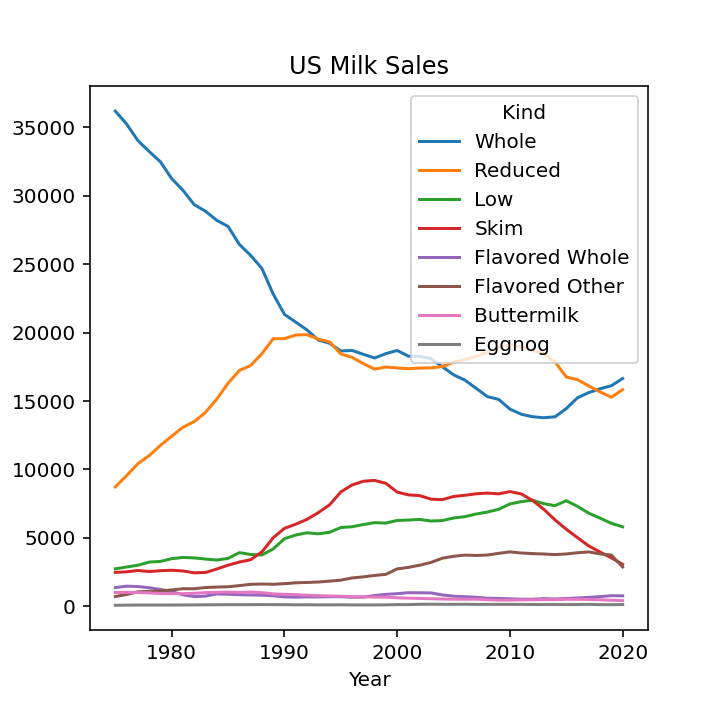

In [12]:
ax = sns.lineplot(x = "Year", y = "Sales", hue = "Kind", data = milk1)
ax.set_title("US Milk Sales")

In [13]:
plt.savefig('seabornplot.png') # saves current plot via matplotlib
ax.get_figure().savefig('output.png') # saves with seaborn

<Figure size 360x360 with 0 Axes>

## Comparing Packages

Let's use the familiar dogs dataset to further compare the different plotting packages.

In [14]:
dogs = pd.read_csv("../data/dogs_full.csv")
dogs.head()

,breed,group,datadog,popularity_all,popularity,lifetime_cost,intelligence_rank,longevity,ailments,price,food_cost,grooming,kids,megarank_kids,megarank,size,weight,height
0,Border Collie,herding,3.64,45,39.0,20143.0,1.0,12.52,2.0,623.0,324.0,weekly,low,1.0,29.0,medium,NaN,20.0
1,Border Terrier,terrier,3.61,80,61.0,22638.0,30.0,14.00,0.0,833.0,324.0,weekly,high,2.0,1.0,small,13.5,NaN
2,Brittany,sporting,3.54,30,30.0,22589.0,19.0,12.92,0.0,618.0,466.0,weekly,medium,3.0,11.0,medium,35.0,19.0
3,Cairn Terrier,terrier,3.53,59,48.0,21992.0,35.0,13.84,2.0,435.0,324.0,weekly,high,4.0,2.0,small,14.0,10.0
4,Welsh Springer Spaniel,sporting,3.34,130,81.0,20224.0,31.0,12.49,1.0,750.0,324.0,weekly,high,5.0,4.0,medium,NaN,18.0


In [15]:
dogs.tail()

,breed,group,datadog,popularity_all,popularity,lifetime_cost,intelligence_rank,longevity,ailments,price,food_cost,grooming,kids,megarank_kids,megarank,size,weight,height
167,Weimaraner,sporting,NaN,32,NaN,NaN,21.0,NaN,1.0,562.0,NaN,weekly,high,NaN,NaN,large,NaN,25.0
168,Welsh Terrier,terrier,NaN,99,NaN,NaN,53.0,NaN,0.0,843.0,NaN,weekly,high,NaN,NaN,small,20.0,15.0
169,Wire Fox Terrier,terrier,NaN,100,NaN,NaN,51.0,13.17,0.0,668.0,NaN,NaN,NaN,NaN,NaN,small,17.5,15.0
170,Wirehaired Pointing Griffon,sporting,NaN,92,NaN,NaN,46.0,8.80,0.0,755.0,NaN,NaN,NaN,NaN,NaN,medium,NaN,22.0
171,Xoloitzcuintli,non-sporting,NaN,155,NaN,NaN,NaN,NaN,NaN,717.0,NaN,NaN,NaN,NaN,NaN,medium,NaN,16.5


### Scatter Plots

Plot the number of dogs in each category.

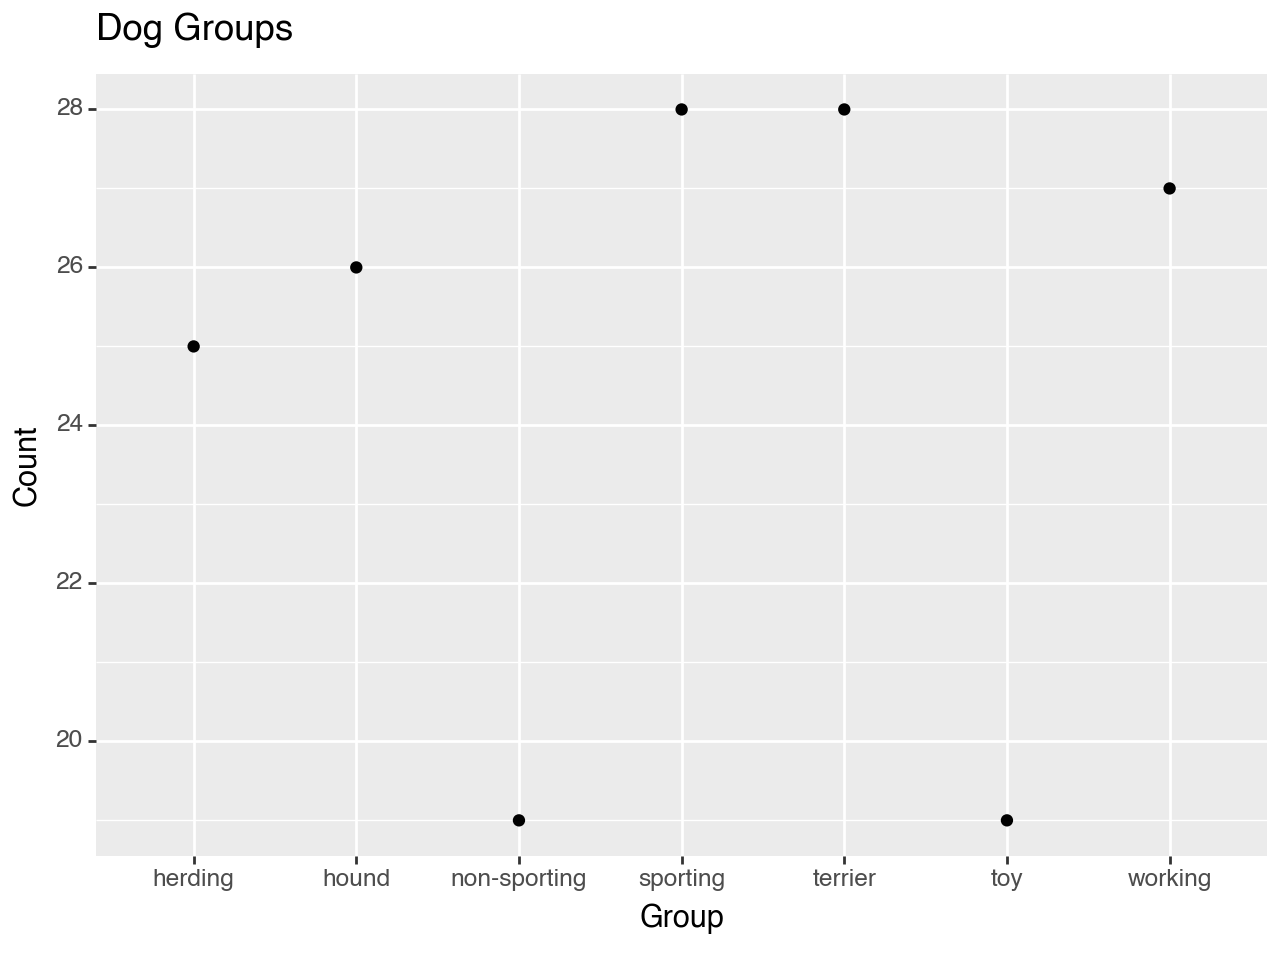

<Figure Size: (640 x 480)>

In [16]:
# Plotnine

p = (p9.ggplot(dogs, p9.aes(x = "group"))
+ p9.geom_point(stat = "count"))
p + p9.labs(title = "Dog Groups", x = "Group", y = "Count")

In [17]:
# Seaborn
counts = dogs["group"].value_counts()
counts

group
terrier         28
sporting        28
working         27
hound           26
herding         25
toy             19
non-sporting    19
Name: count, dtype: int64

[Text(0, 0, 'terrier'),
 Text(1, 0, 'sporting'),
 Text(2, 0, 'working'),
 Text(3, 0, 'hound'),
 Text(4, 0, 'herding'),
 Text(5, 0, 'toy'),
 Text(6, 0, 'non-sporting')]

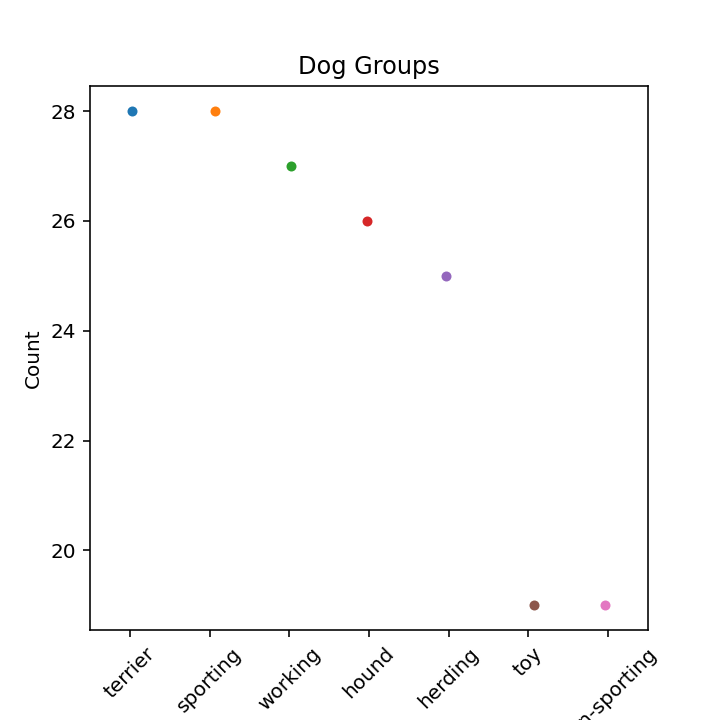

In [18]:
ax = sns.stripplot(x = counts.index, y = counts)
ax.set(title = "Dog Groups", xlabel = "Group", ylabel = "Count") # prints and returns list 
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

[Text(0.5, 1.0, 'Dog Groups'), Text(0.5, 0, 'Group'), Text(0, 0.5, 'Count')]

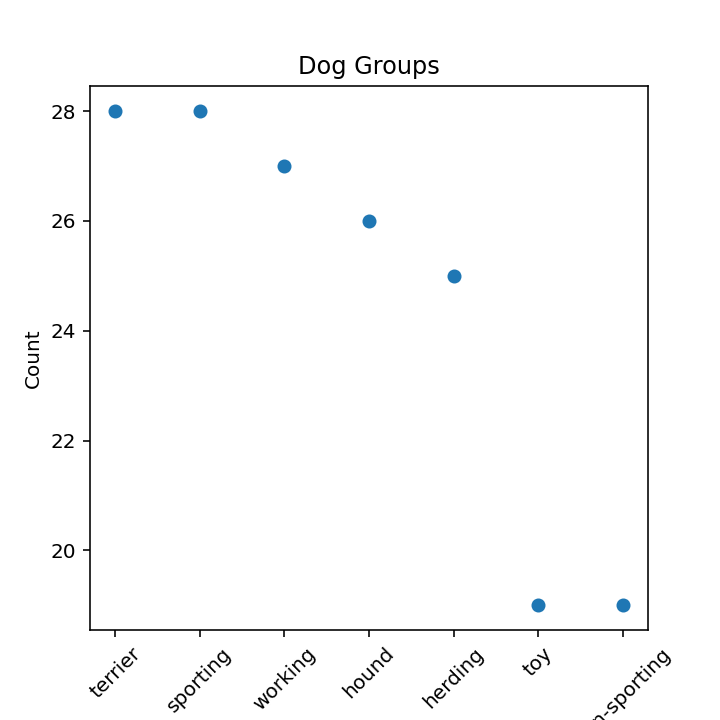

In [19]:
ax = counts.plot(style = "o", rot = 45)
ax.set(title = "Dog Groups", xlabel = "Group", ylabel = "Count")

### Box Plots

Plot the distribution of dog longevity, grouped by category.

/Users/soobin.kim/opt/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 37 rows containing non-finite values.


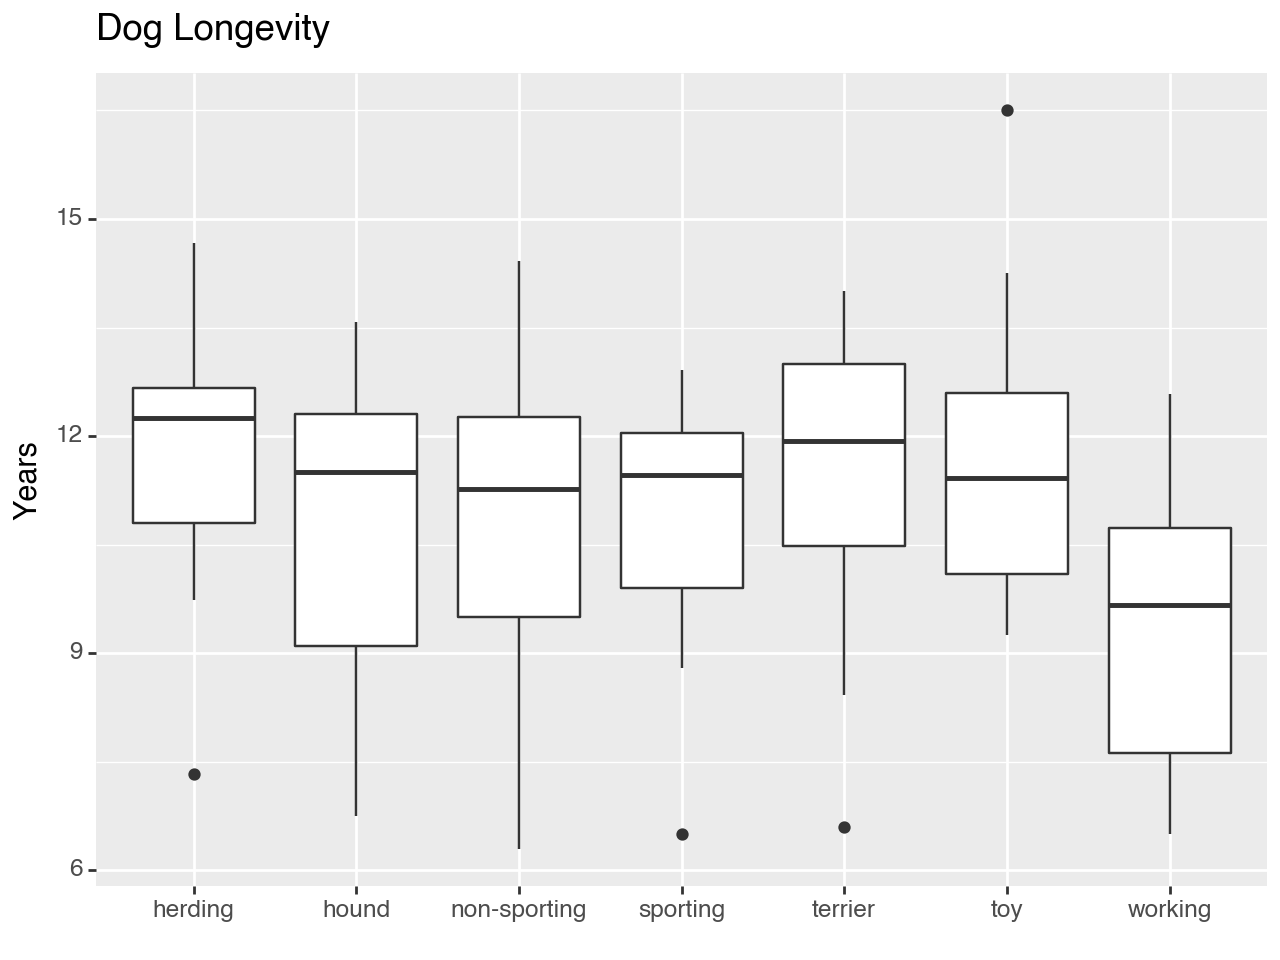

<Figure Size: (640 x 480)>

In [20]:
# Plotnine
( 
    p9.ggplot(dogs, p9.aes("group", "longevity")) 
    + p9.geom_boxplot()
    + p9.labs(title = "Dog Longevity", x = "", y = "Years")
)

[Text(0, 0, 'herding'),
 Text(1, 0, 'terrier'),
 Text(2, 0, 'sporting'),
 Text(3, 0, 'toy'),
 Text(4, 0, 'working'),
 Text(5, 0, 'non-sporting'),
 Text(6, 0, 'hound')]

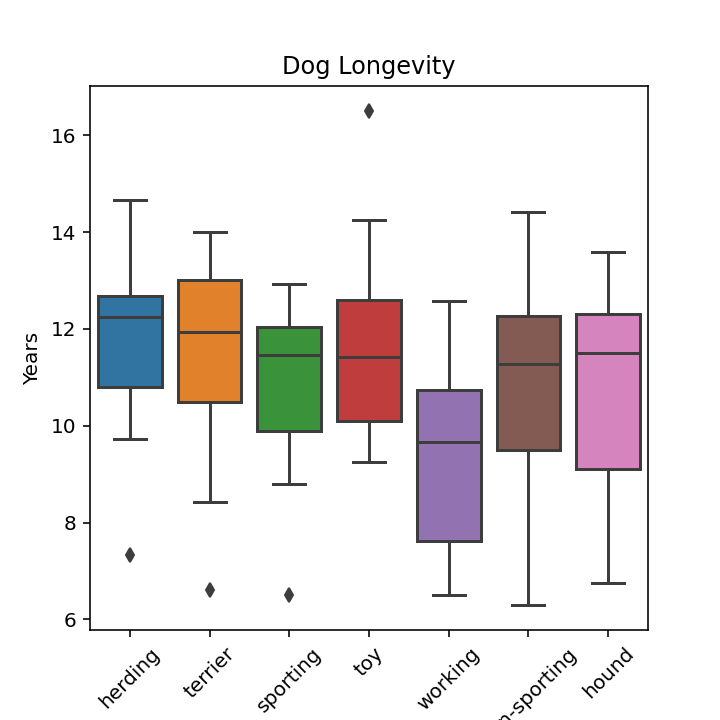

In [21]:
# Seaborn

ax = sns.boxplot(x = "group", y = "longevity", data = dogs)
ax.set(title = "Dog Longevity", xlabel = "", ylabel = "Years")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

Text(0.5, 0.98, '')

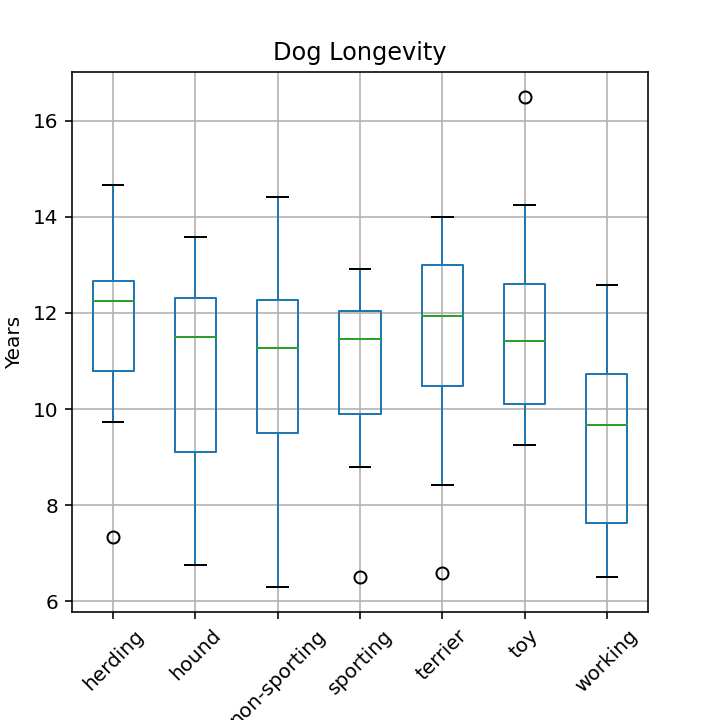

In [22]:
# Pandas

ax = dogs.boxplot(by = "group", column = "longevity", rot = 45)
ax.set(title = "Dog Longevity", xlabel = "", ylabel = "Years")
# Hide grouping title Pandas adds.
ax.get_figure().suptitle("")

### Scatter Plots

Plot popularity against datadog score.

/Users/soobin.kim/opt/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 85 rows containing missing values.


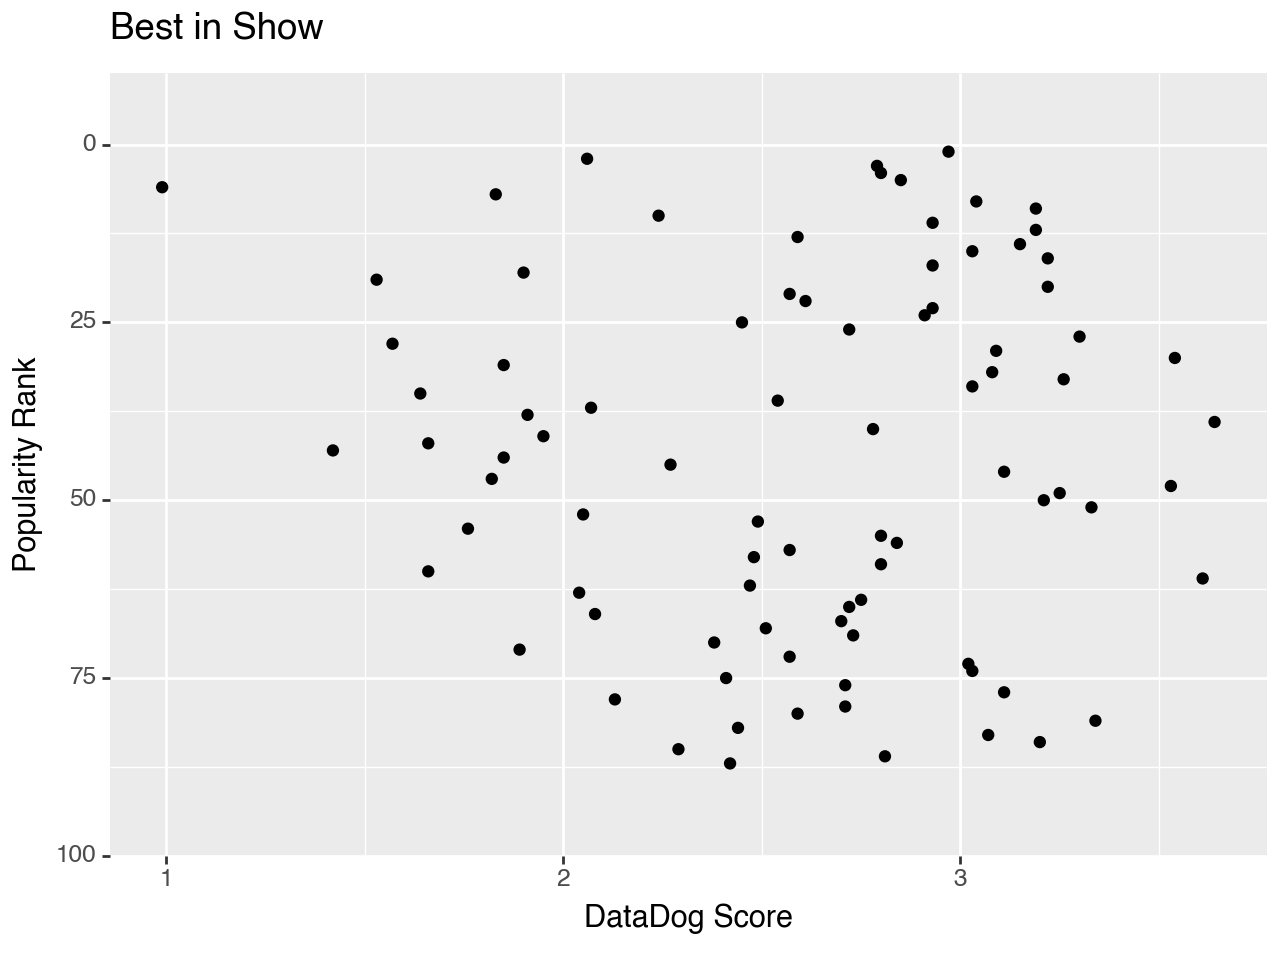

<Figure Size: (640 x 480)>

In [23]:
# Plotnine

(
    p9.ggplot(dogs, p9.aes("datadog", "popularity"))
    + p9.geom_point()
    + p9.labs(title = "Best in Show", x = "DataDog Score", y = "Popularity Rank")
    + p9.ylim(95, -5)
)

(91.3, -3.3)

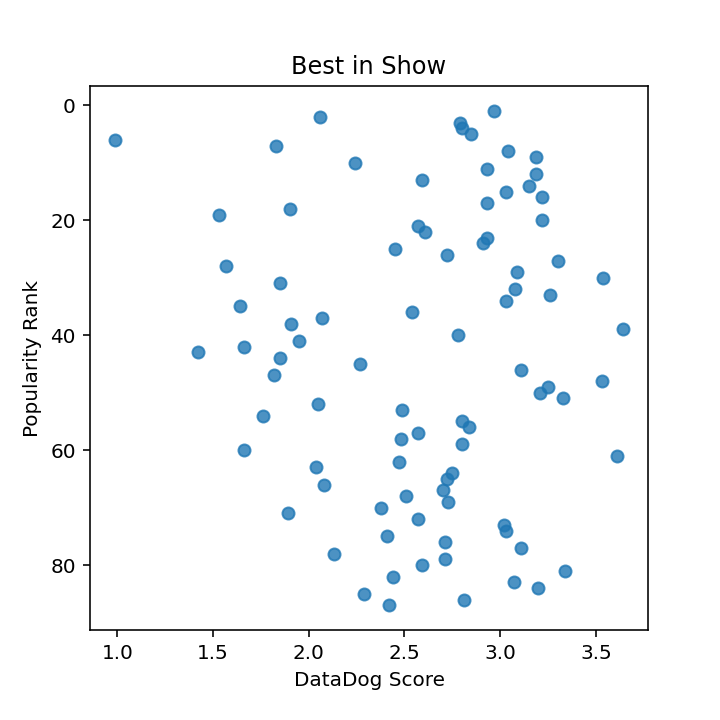

In [24]:
# Seaborn
ax = sns.regplot(x = "datadog", y = "popularity", data = dogs, 
                 fit_reg = False)
ax.set(title = "Best in Show", xlabel = "DataDog Score", ylabel = "Popularity Rank")
ax.set_ylim(reversed(ax.get_ylim()))

(91.3, -3.3)

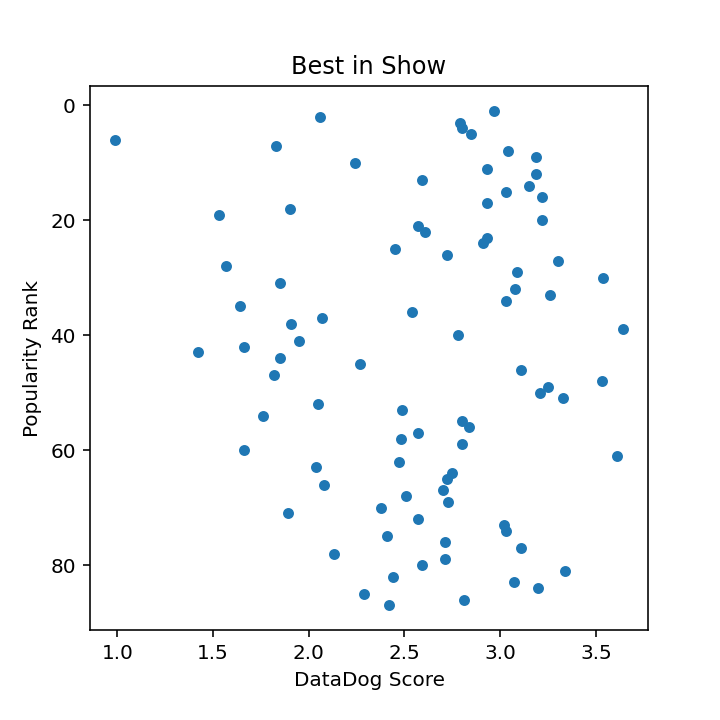

In [25]:
# Pandas

ax = dogs.plot.scatter(x = "datadog", y = "popularity")
ax.set(title = "Best in Show", xlabel = "DataDog Score", ylabel = "Popularity Rank")
ax.set_ylim(reversed(ax.get_ylim()))

### Image processing

In [26]:
# Automatically display matplotlib plots, so that we don't have to write `plt.show()`.
# Normally this should be in a cell at the top of the notebook.
%matplotlib inline

numpy.ndarray

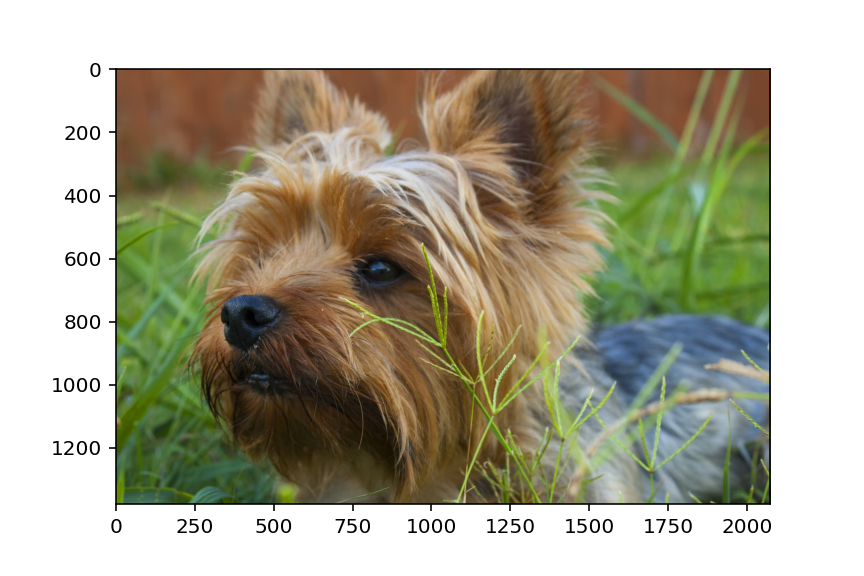

In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as img

# Dog image from https://unsplash.com/photos/jx_kpR7cvDc
dog = img.imread("../data/dog.png")
plt.imshow(dog)

type(dog)

In [28]:
dog.shape

(1378, 2073, 3)

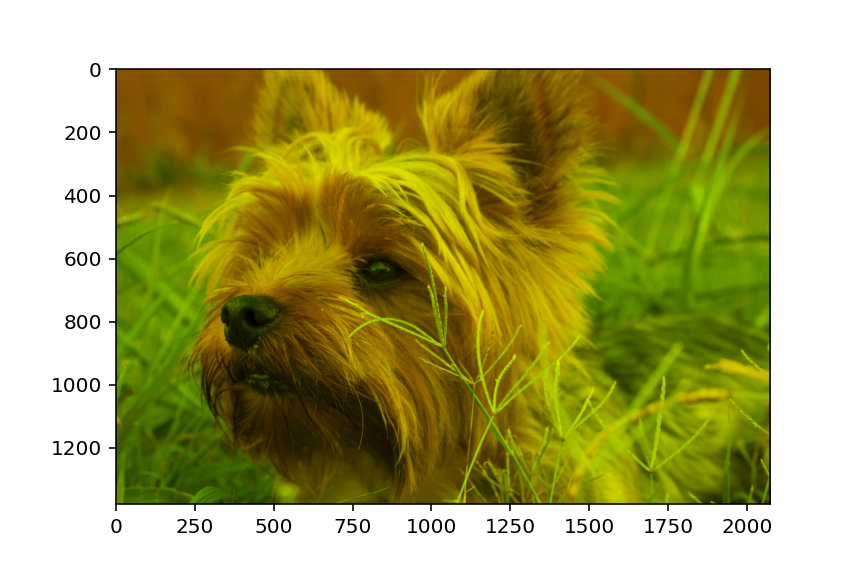

In [29]:
dog_rg = dog.copy()
dog_rg[:,:,2] = 0
plt.imshow(dog_rg)

Depending on which package you use to load an image, pixels may be encoded as integers or floating point (decimal) numbers. The scikit-image package has [some documentation](http://scikit-image.org/docs/dev/user_guide/data_types.html) about what these numbers typically mean.

In [30]:
dog.dtype

dtype('float32')

Let's try to find all the green pixels and make them red.

How can we do this?

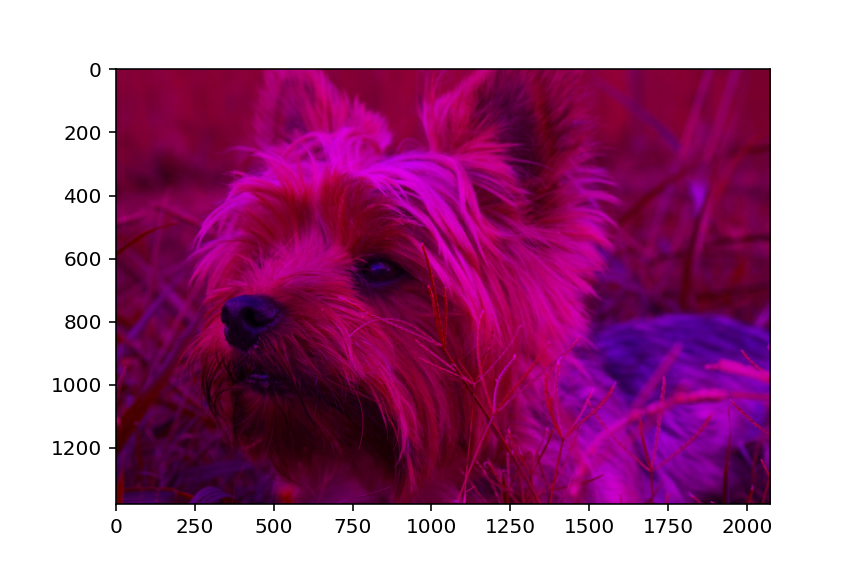

In [31]:
reddog_rgb = dog.copy()
#reddog_rgb[:, :, 0] = 1 # Set red channel to large value.
reddog_rgb[:, :, 1] = 0 # Set green channel to small value.
plt.imshow(reddog_rgb)

Break problems into small steps.

If you're trying to figure out how something works, test on small "toy" examples and draw pictures.

In [ ]:
import numpy as np
import skimage as ski
import skimage.color

# Switch from (red, green, blue) to (hue, saturation, value).
# Hue is the color (from red to violet).
# Saturation is how colorful (from colorless to colorful).
# Value is how bright (from black to bright color).
dog_hsv = ski.color.rgb2hsv(dog)
plt.imshow(dog_hsv)

In [ ]:
dog_hsv.shape

 Start by taking a small piece of the dog image, say the lower left corner.

In [ ]:
grass = dog_hsv[-200:, :200, :] #dog_hsv[266-50:266, 0:50, :]
plt.imshow(ski.color.hsv2rgb(grass))

How can we figure out what "green" looks like in HSV?

In [ ]:
mu = grass.mean(axis = (0, 1))
mu

We can preview this "green" by making a 2x2 swatch.

In [ ]:
swatch = np.stack(4 * [mu]).reshape((2, 2, 3))
plt.imshow(ski.color.hsv2rgb(swatch))

Now we need to get all pixels with a hue "nearby" the grass mean.

How can we define "nearby"?

In [ ]:
sd = grass.std(axis = (0, 1))
sd

In [ ]:
tol = (mu[0] - 3 * sd[0], mu[0] + 3 * sd[0])
tol

In [ ]:
reddog = dog_hsv.copy()
is_green = (tol[0] <= reddog[:, :, 0]) & (reddog[:, :, 0] <= tol[1])
reddog[is_green, 0] = 0
plt.imshow(ski.color.hsv2rgb(reddog))

What would happen if we tried this with RGB instead of HSV?